# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [15]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy 

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [16]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

621

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [17]:
# OpenWeatherMap API Key
api_key = "194b40823abcc67b2ed3df79f617f984"

# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key


# Create empty lists to append the API data into lists 
city_name = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []

# Start the call counter 
record = 1

# Log file print statement
print(f"Beginning Data Retrieval")
print(f"-------------------------------")

#Loop through the cities in the city list 
for city in cities:  
    
    # Try statement to append calls where value is found 
    # Not all calls return data as OpenWeatherMap will not have have records in all the cities generated by CityPy module
    try: 
        response = requests.get(f"{url}&q={city}").json() 
        city_name.append(response["name"])
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        max_temp.append(response["main"]["temp_max"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        wind_speed.append(response["wind"]["speed"])
        city_record = response["name"]
        print(f"Processing Record {record} | {city_record}")
        print(f"{url}&q={city}")
        
        # Increase counter by one 
        record= record + 1
        
        # Wait a second in loop to not over exceed rate limit of API
        time.sleep(1.01)
        
    # If no record found "skip" to next call
    except:
        print("City not found. Skipping...")
    continue

Beginning Data Retrieval
-------------------------------
Processing Record 1 | Samarai
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=194b40823abcc67b2ed3df79f617f984&q=samarai
Processing Record 2 | Salalah
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=194b40823abcc67b2ed3df79f617f984&q=salalah
Processing Record 3 | Ushuaia
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=194b40823abcc67b2ed3df79f617f984&q=ushuaia
Processing Record 4 | Arraial do Cabo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=194b40823abcc67b2ed3df79f617f984&q=arraial do cabo
Processing Record 5 | Oktyabrskoye
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=194b40823abcc67b2ed3df79f617f984&q=oktyabrskoye
Processing Record 6 | Mount Gambier
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=194b40823abcc67b2ed3df79f617f984&q=mount gambier
Processing Record 7 | Tuktoyaktuk
http://api.openweathermap

Processing Record 57 | Avarua
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=194b40823abcc67b2ed3df79f617f984&q=avarua
Processing Record 58 | Lagoa
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=194b40823abcc67b2ed3df79f617f984&q=lagoa
Processing Record 59 | Lavrentiya
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=194b40823abcc67b2ed3df79f617f984&q=lavrentiya
City not found. Skipping...
City not found. Skipping...
Processing Record 60 | Port Macquarie
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=194b40823abcc67b2ed3df79f617f984&q=port macquarie
City not found. Skipping...
Processing Record 61 | Khash
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=194b40823abcc67b2ed3df79f617f984&q=khash
Processing Record 62 | Ipanguacu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=194b40823abcc67b2ed3df79f617f984&q=ipanguacu
Processing Record 63 | Saint-Joseph
http://api.ope

Processing Record 113 | Loei
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=194b40823abcc67b2ed3df79f617f984&q=loei
Processing Record 114 | Boyolangu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=194b40823abcc67b2ed3df79f617f984&q=boyolangu
Processing Record 115 | Mount Isa
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=194b40823abcc67b2ed3df79f617f984&q=mount isa
City not found. Skipping...
Processing Record 116 | Cherskiy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=194b40823abcc67b2ed3df79f617f984&q=cherskiy
Processing Record 117 | Srednekolymsk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=194b40823abcc67b2ed3df79f617f984&q=srednekolymsk
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
Processing Record 118 | Butia
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=194b40823abcc67b2ed3df79f617f984&q=butia
Processing Record 

Processing Record 168 | Bilma
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=194b40823abcc67b2ed3df79f617f984&q=bilma
Processing Record 169 | Bolivar
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=194b40823abcc67b2ed3df79f617f984&q=bolivar
Processing Record 170 | Grand Gaube
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=194b40823abcc67b2ed3df79f617f984&q=grand gaube
Processing Record 171 | Bethel
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=194b40823abcc67b2ed3df79f617f984&q=bethel
Processing Record 172 | Borazjan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=194b40823abcc67b2ed3df79f617f984&q=borazjan
Processing Record 173 | Kattivakkam
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=194b40823abcc67b2ed3df79f617f984&q=kattivakkam
Processing Record 174 | Saint Anthony
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=194b40823abcc67b2ed3df79

Processing Record 224 | Fredericksburg
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=194b40823abcc67b2ed3df79f617f984&q=fredericksburg
Processing Record 225 | Bambous Virieux
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=194b40823abcc67b2ed3df79f617f984&q=bambous virieux
Processing Record 226 | Sobolevo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=194b40823abcc67b2ed3df79f617f984&q=sobolevo
Processing Record 227 | Talnakh
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=194b40823abcc67b2ed3df79f617f984&q=talnakh
Processing Record 228 | Tasiilaq
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=194b40823abcc67b2ed3df79f617f984&q=tasiilaq
Processing Record 229 | Paita
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=194b40823abcc67b2ed3df79f617f984&q=paita
Processing Record 230 | Guerrero Negro
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=194b4

Processing Record 280 | Am Timan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=194b40823abcc67b2ed3df79f617f984&q=am timan
Processing Record 281 | Souillac
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=194b40823abcc67b2ed3df79f617f984&q=souillac
Processing Record 282 | Faya
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=194b40823abcc67b2ed3df79f617f984&q=faya
Processing Record 283 | Norman Wells
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=194b40823abcc67b2ed3df79f617f984&q=norman wells
Processing Record 284 | Kenora
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=194b40823abcc67b2ed3df79f617f984&q=kenora
Processing Record 285 | Aranos
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=194b40823abcc67b2ed3df79f617f984&q=aranos
Processing Record 286 | Moroni
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=194b40823abcc67b2ed3df79f617f984&q=moro

Processing Record 336 | Kiama
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=194b40823abcc67b2ed3df79f617f984&q=kiama
Processing Record 337 | Dalhousie
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=194b40823abcc67b2ed3df79f617f984&q=dalhousie
Processing Record 338 | Hambantota
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=194b40823abcc67b2ed3df79f617f984&q=hambantota
Processing Record 339 | Majholi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=194b40823abcc67b2ed3df79f617f984&q=majholi
City not found. Skipping...
Processing Record 340 | Hohhot
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=194b40823abcc67b2ed3df79f617f984&q=hohhot
Processing Record 341 | Santa Fe
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=194b40823abcc67b2ed3df79f617f984&q=santa fe
Processing Record 342 | Matagami
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=194b408

Processing Record 392 | Lincoln
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=194b40823abcc67b2ed3df79f617f984&q=lincoln
Processing Record 393 | Bogale
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=194b40823abcc67b2ed3df79f617f984&q=bogale
Processing Record 394 | Cavalcante
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=194b40823abcc67b2ed3df79f617f984&q=cavalcante
Processing Record 395 | Robertsport
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=194b40823abcc67b2ed3df79f617f984&q=robertsport
Processing Record 396 | Tuatapere
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=194b40823abcc67b2ed3df79f617f984&q=tuatapere
Processing Record 397 | Miri
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=194b40823abcc67b2ed3df79f617f984&q=miri
City not found. Skipping...
Processing Record 398 | Jaszkiser
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=19

Processing Record 449 | Mayo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=194b40823abcc67b2ed3df79f617f984&q=mayo
City not found. Skipping...
Processing Record 450 | Teeli
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=194b40823abcc67b2ed3df79f617f984&q=teeli
Processing Record 451 | Iranshahr
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=194b40823abcc67b2ed3df79f617f984&q=iranshahr
Processing Record 452 | Port Shepstone
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=194b40823abcc67b2ed3df79f617f984&q=port shepstone
Processing Record 453 | Nishihara
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=194b40823abcc67b2ed3df79f617f984&q=nishihara
Processing Record 454 | Baoqing
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=194b40823abcc67b2ed3df79f617f984&q=baoqing
Processing Record 455 | Salta
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=194b

Processing Record 505 | Devils Lake
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=194b40823abcc67b2ed3df79f617f984&q=devils lake
Processing Record 506 | Hovd
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=194b40823abcc67b2ed3df79f617f984&q=hovd
Processing Record 507 | Finnsnes
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=194b40823abcc67b2ed3df79f617f984&q=finnsnes
Processing Record 508 | Manoel Urbano
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=194b40823abcc67b2ed3df79f617f984&q=manoel urbano
Processing Record 509 | Mecca
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=194b40823abcc67b2ed3df79f617f984&q=mecca
Processing Record 510 | Sangar
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=194b40823abcc67b2ed3df79f617f984&q=sangar
Processing Record 511 | Westport
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=194b40823abcc67b2ed3df79f617f98

Processing Record 560 | Kalabo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=194b40823abcc67b2ed3df79f617f984&q=kalabo
Processing Record 561 | Morant Bay
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=194b40823abcc67b2ed3df79f617f984&q=morant bay
Processing Record 562 | Huicheng
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=194b40823abcc67b2ed3df79f617f984&q=huicheng
Processing Record 563 | Kahului
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=194b40823abcc67b2ed3df79f617f984&q=kahului
Processing Record 564 | San Vicente
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=194b40823abcc67b2ed3df79f617f984&q=san vicente
Processing Record 565 | Komsomolskiy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=194b40823abcc67b2ed3df79f617f984&q=komsomolskiy


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [18]:
# Create a dictonary with the lists generated
weatherpy_dict = {
    "City": city_name,
    "Cloudiness":cloudiness, 
    "Country":country,
    "Date":date, 
    "Humidity": humidity,
    "Lat":lat, 
    "Lng":lng, 
    "Max Temp": max_temp,
    "Wind Speed":wind_speed
}

# Create a data frame from dictionary
weather_data = pd.DataFrame(weatherpy_dict)

# Display count of weather data values 
weather_data.count()

City          565
Cloudiness    565
Country       565
Date          565
Humidity      565
Lat           565
Lng           565
Max Temp      565
Wind Speed    565
dtype: int64

In [21]:
# Save data frame to CSV
weather_data.to_csv("Output_CSV/weather_data.csv")

# Display data frame head 
weather_data.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Samarai,92,PG,1553385268,100,-10.62,150.67,78.55,7.74
1,Salalah,40,OM,1553381400,78,17.01,54.10,78.80,8.05
2,Ushuaia,40,AR,1553382000,62,-54.81,-68.31,53.60,8.05
3,Arraial do Cabo,20,BR,1553382000,88,-22.97,-42.02,73.40,2.24
4,Oktyabrskoye,0,RU,1553383883,80,56.73,85.44,33.01,6.71


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

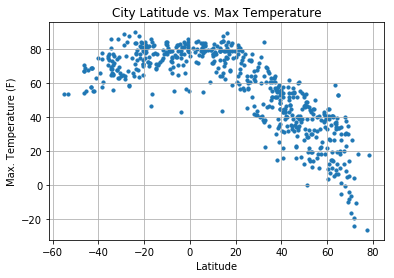

In [23]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Max Temp"], marker="o", s=10)

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature")
plt.ylabel("Max. Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Output_Plots/Max_Temp_vs_Latitude.png")

# Show plot
plt.show()

#### Latitude vs. Humidity Plot

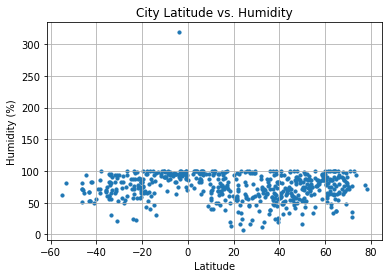

In [24]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Humidity"], marker="o", s=10)

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Output_Plots/Humidity_vs_Latitude.png")

# Show plot
plt.show()

#### Latitude vs. Cloudiness Plot

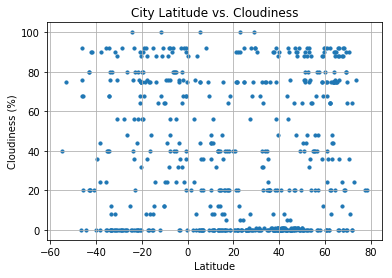

In [25]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Cloudiness"], marker="o", s=10)

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Output_Plots/Cloudiness_vs_Latitude.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

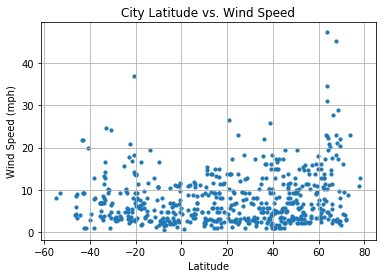

In [26]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Wind Speed"], marker="o", s=10)

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Output_Plots/Wind_Speed_vs_Latitude.png")

# Show plot
plt.show()

Final Analysis

1. The weather becomes warmer as one approaches the 0-degree latitude. The latitude is increasing with the decreasing of the weather temperature. 

2. There is no strong relationship between latitude and humidity. Most of citis are in the humidity range from 50% to 100%.

3. There is no strong relationship between latitude and wind speed. However, 5 cities are with over 30 mph of wind. 4 of them sit in northern hemispheres.